In [1]:
from google.colab import files
uploaded = files.upload()

Saving cleanData.csv to cleanData.csv


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

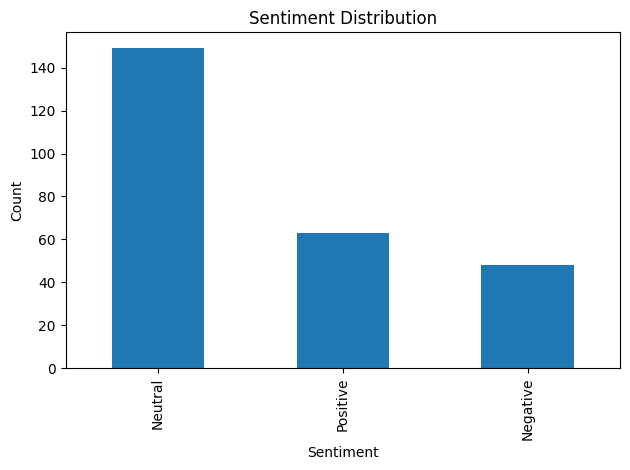

In [3]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load uploaded CSV (replace with actual name if different)
df = pd.read_csv('cleanData.csv')
response_col = "Comments by Stakeholders"

# Initialize VADER
sid = SentimentIntensityAnalyzer()
# Apply sentiment analysis
df['SentimentScore'] = df[response_col].apply(
    lambda x: sid.polarity_scores(str(x))['compound'] if pd.notnull(x) else None
)
# Categorize sentiment
df['SentimentLabel'] = df['SentimentScore'].apply(
    lambda x: "Positive" if x >= 0.03 else ("Negative" if x <= -0.03 else "Neutral")
)
# Save processed file
df.to_csv("survey_with_sentiment.csv", index=False)
#  Download the file back to your computer
files.download("survey_with_sentiment.csv")
#  Plot sentiment distribution
df['SentimentLabel'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()